In [1]:
## In this sample we will use the diamond dataset 

In [2]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
# Data preprocessing

In [4]:
from pycaret.regression import *

In [6]:
s = setup(data, target = 'Price', 
          transform_target = True, 
          log_experiment = True, 
          #log_plots = True,
          experiment_name = 'diamond',
         )

,Description,Value
0,Session id,6808
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


2023/07/20 13:36:28 INFO mlflow.tracking.fluent: Experiment with name 'diamond' does not exist. Creating a new experiment.


In [7]:
# model training

In [8]:
# compare the models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,631.3540,1803964.9935,1308.4277,0.9834,0.0659,0.0482,0.8460
gbr,Gradient Boosting Regressor,759.6852,2374791.3795,1516.3809,0.9778,0.0767,0.0573,0.8680
rf,Random Forest Regressor,726.7188,2430637.7094,1526.5456,0.9777,0.0770,0.0556,1.5020
et,Extra Trees Regressor,742.6763,2483637.1747,1540.9340,0.9771,0.0788,0.0573,1.5560
dt,Decision Tree Regressor,953.9395,3976013.3584,1958.7543,0.9628,0.1033,0.0737,0.6280
ada,AdaBoost Regressor,1995.7872,16828433.5011,4021.6846,0.8460,0.1876,0.1521,0.7880
knn,K Neighbors Regressor,3011.1375,35966932.8172,5961.5825,0.6584,0.3604,0.2265,0.5560
omp,Orthogonal Matching Pursuit,3376.9584,83813561.9521,8898.1728,0.2108,0.2838,0.2222,0.4900
llar,Lasso Least Angle Regression,6699.2797,118748736.8711,10841.9765,-0.1263,0.7208,0.5749,0.5800
lasso,Lasso Regression,6699.2797,118748736.8711,10841.9765,-0.1263,0.7208,0.5749,0.5830


In [9]:
# Check residuals of the trained model

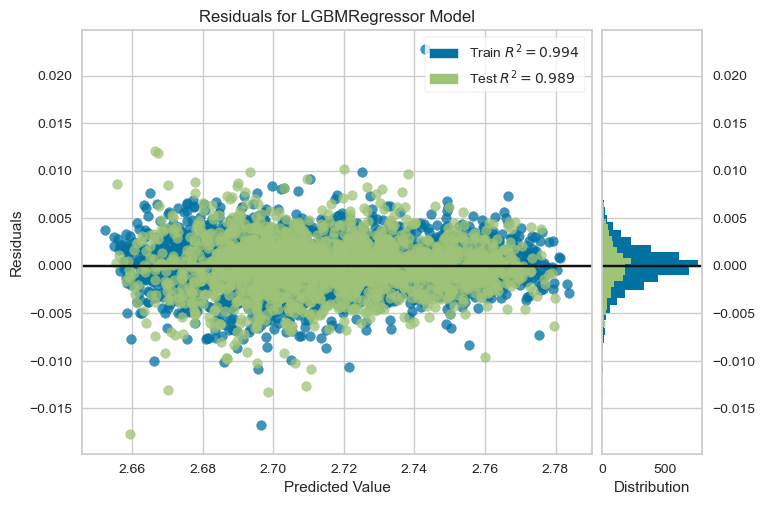

In [10]:
plot_model(estimator=best,plot='residuals')

In [12]:
## Checking for the feature importance

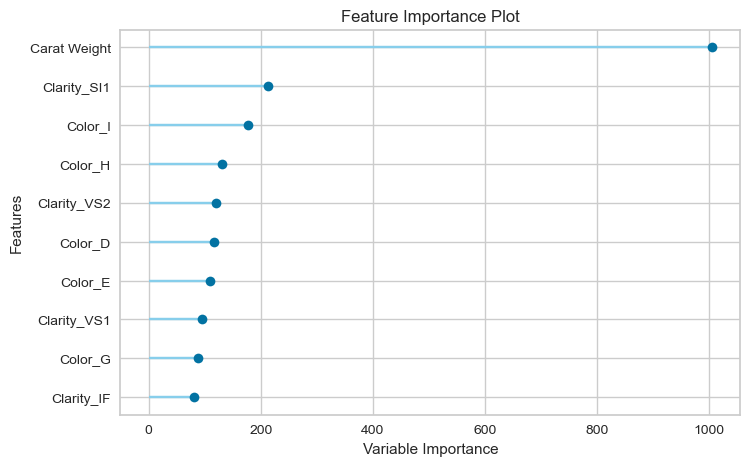

In [13]:
plot_model(best,plot='feature')

In [14]:
# finalizing the model

In [15]:
final_model = finalize_model(best)

# Saving final model
save_model(final_model,'diamond pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\danca\AppData\Local\Temp\joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWra...
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                                                     

# model management with mlfow

In [18]:
#!mlflow ui
#localhost:5000